In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import plotly
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
init_notebook_mode(connected = True)
import chart_studio.plotly as py
cf.go_offline()

In [2]:
# Source:
# https://www.cps.edu/globalassets/cps-pages/about-cps/district-data/metrics/assessment-reports/isa-2016-2019-citywide.xls

In [3]:
# Citywide Chicago Public School Science Assessment Reports 2016 - 2019
# Place CSV file within same directory as Jupyter Notebook
df1 = pd.read_excel("isa-2016-2019-citywide.xls", sheet_name = "ISA Results", skiprows = 1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      397 non-null    int64  
 1   Grade Level or Test       397 non-null    object 
 2   Category                  397 non-null    object 
 3   Group                     385 non-null    object 
 4   # Students Tested         397 non-null    int64  
 5   Overall Mean Scale Score  397 non-null    int64  
 6   % Not Proficient          397 non-null    float64
 7   % Proficient              397 non-null    float64
 8   # Not Proficient          397 non-null    int64  
 9   # Proficient              397 non-null    int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 31.1+ KB


In [4]:
# Each Strata Category of Students
print(df1["Category"].unique())

['All' 'Gender' 'Race and Ethnicity' 'Race and Ethnicity/Gender'
 'Students with Individual Education Plans'
 'Students in CPS English Language Learner Programs'
 'Students Designated English Language Learners by the State'
 'Economically Disadvantaged Students']


In [5]:
# Each Category 
print(df1["Grade Level or Test"].unique())

['Grade 5' 'Grade 8' 'Biology']


Text(0.5, 1.0, 'Scaled Mean Scores From 2016-2019')

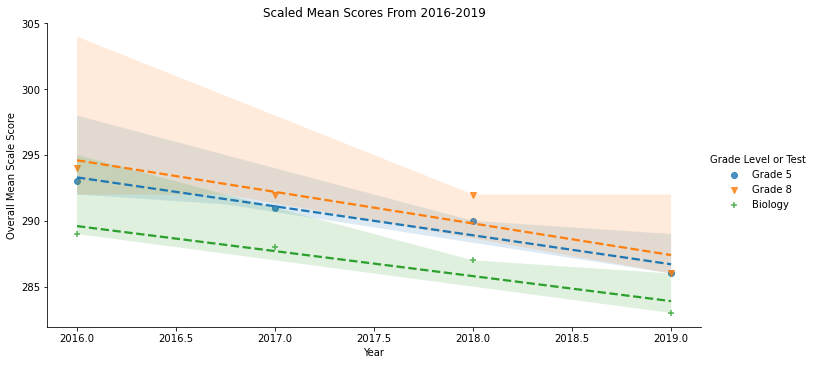

In [6]:
# Scaled Mean Scores 
sns.lmplot(x = "Year", y = "Overall Mean Scale Score", data = df1[df1["Category"]=="All"],hue = "Grade Level or Test", markers = ["o","v","+"],line_kws = {"ls":"--"}, height = 5, aspect = 2)
plt.title("Scaled Mean Scores From 2016-2019")

In [14]:
# Correlation with year and Overall Mean Scores for all grade levels
st.pearsonr(df1[df1["Category"]=="All"]["Year"],df1[df1["Category"]=="All"]["Overall Mean Scale Score"])

(-0.7589502311127303, 0.004205821588635345)

In [20]:
df1[df1["Category"]=="All"].iplot(kind = "scatter", x = "Year", y = "% Proficient", categories = "Grade Level or Test", title = "% Proficienct From 2016-2019", yTitle = "Percent", xTitle = "Year")

In [16]:
# Correlation with year and % proficient for all grade levels
st.pearsonr(df1[df1["Category"]=="All"]["Year"],df1[df1["Category"]=="All"]["% Proficient"])

(-0.26266478756771927, 0.4094885370712274)

In [11]:
df1[df1["Category"]=="All"]["Overall Mean Scale Score"].iplot(kind = "hist", bins = 10, title = "Overall Mean Score from Grade 5, Grade 8, and HS Biology over 2016-2019", xTitle = "Overall Mean Scale Score", yTitle = "Frequency")

In [12]:
df1[df1["Category"]=="All"]["% Proficient"].iplot(kind = "hist", title = "% Proficient in Grade 5, Grade 8, and HS Biology over 2016-2019", xTitle = "% Proficient", yTitle = "Frequency")

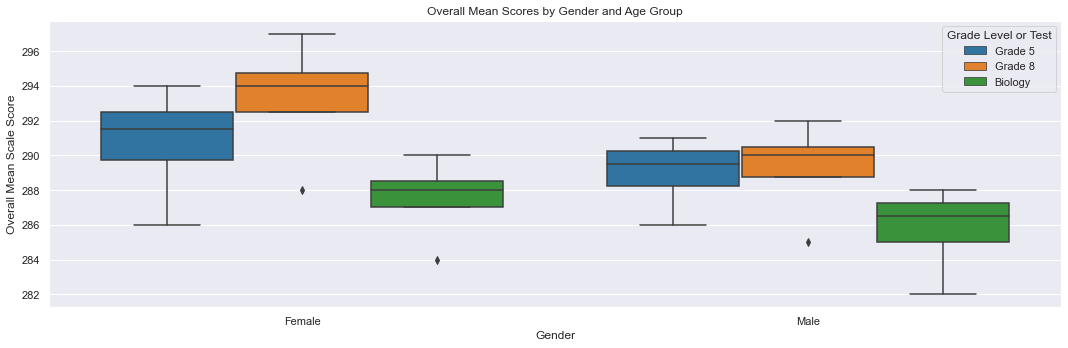

In [97]:
# Scaled Mean Scores over ALL Grade Levels by Gender
gender = df1[df1["Category"]=="Gender"]
omsg = sns.boxplot(x = "Group", y = "Overall Mean Scale Score", data = gender, palette = "tab10", hue = "Grade Level or Test")
omsg.set_title("Overall Mean Scores by Gender and Age Group")
omsg.set_xlabel("Gender")
plt.tight_layout()

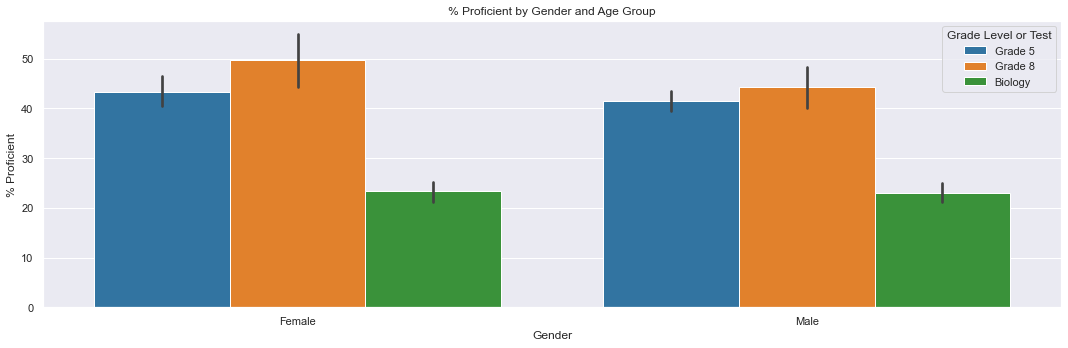

In [13]:
# % Proficient over ALL Grade Levels by Gender
omsg2 = sns.barplot(x = "Group", y = "% Proficient", data = gender, palette = "tab10", hue = "Grade Level or Test")
omsg2.set_title("% Proficient by Gender and Age Group")
omsg2.set_xlabel("Gender")
plt.tight_layout()

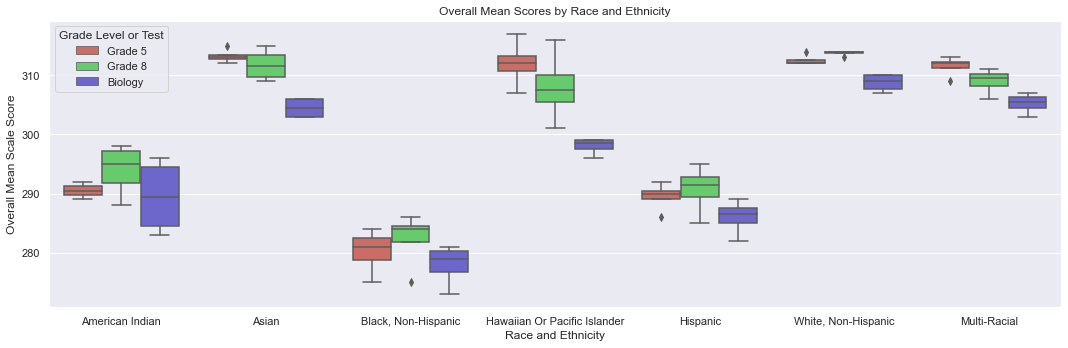

In [14]:
# Scaled Mean Scores over ALL Grade Levels by Race and Ethnicity
raeth = df1[(df1["Category"]=="Race and Ethnicity")&(df1["Group"]!="Unknown Race")]
raethg = sns.boxplot(x = "Group", y = "Overall Mean Scale Score", data = raeth, palette = "hls",hue = "Grade Level or Test")
raethg.set_title("Overall Mean Scores by Race and Ethnicity")
raethg.set_xlabel("Race and Ethnicity")
plt.tight_layout()

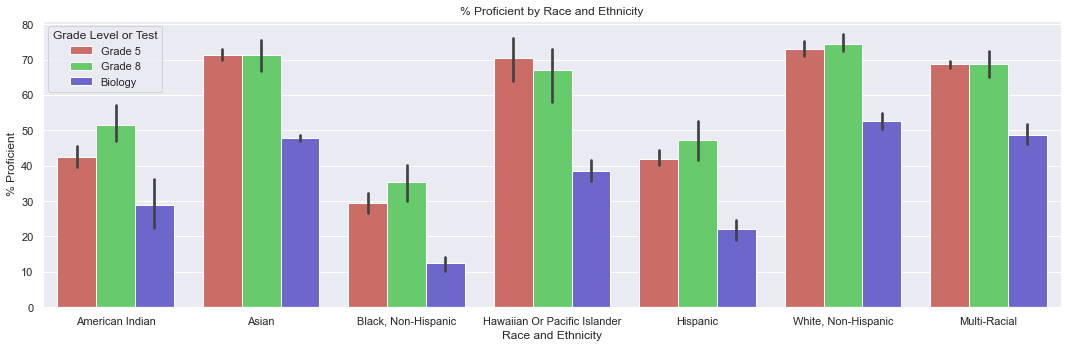

In [15]:
# % Proficient over ALL Grade Levels by Race and Ethnicity
raethg2 = sns.barplot(x = "Group", y = "% Proficient", data = raeth, palette = "hls", hue = "Grade Level or Test")
raethg2.set_title("% Proficient by Race and Ethnicity")
raethg2.set_xlabel("Race and Ethnicity")
plt.tight_layout()

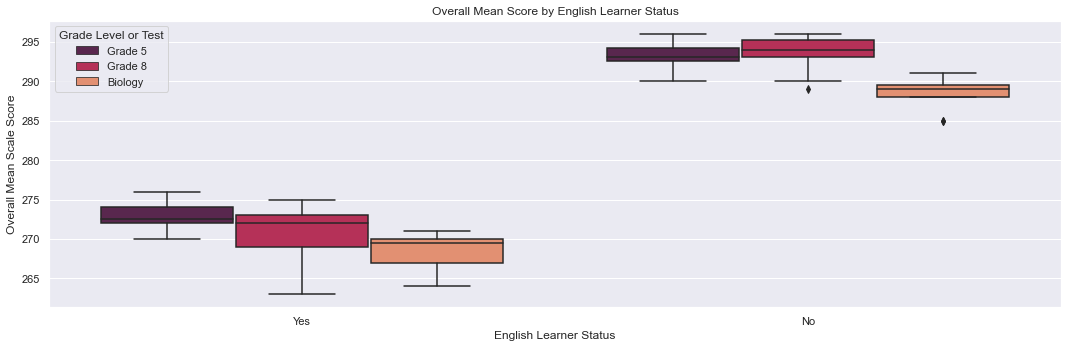

In [63]:
# Scaled Mean Scores over ALL Grade Levels by English Proficiency
engp = df1[(df1["Category"]=="Students in CPS English Language Learner Programs")|(df1["Category"]=="Students Designated English Language Learners by the State")]
engpg = sns.boxplot(x = "Group", y = "Overall Mean Scale Score", data = engp, palette = "rocket", hue = "Grade Level or Test")
engpg.set_title("Overall Mean Score by English Learner Status")
engpg.set_xlabel("English Learner Status")
plt.tight_layout()

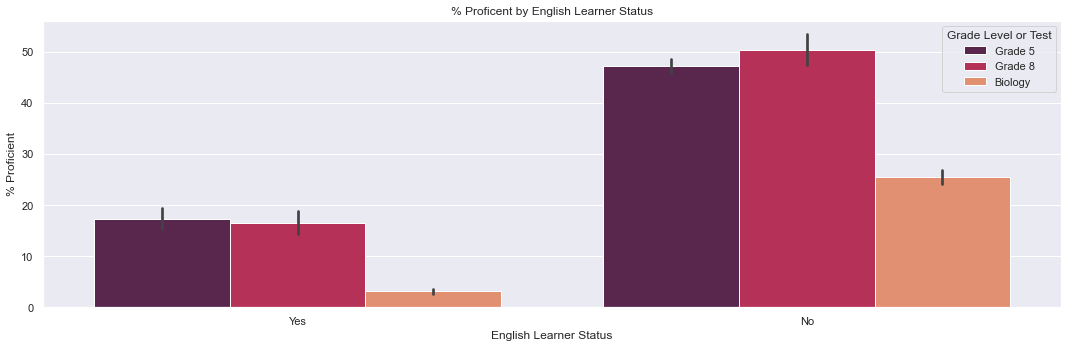

In [17]:
# % Proficient over ALL Grade Levels by English Proficiency
engpg2 = sns.barplot(x = "Group", y = "% Proficient", data = engp, palette = "rocket", hue = "Grade Level or Test")
engpg2.set_title("% Proficent by English Learner Status")
engpg2.set_xlabel("English Learner Status")
plt.tight_layout()

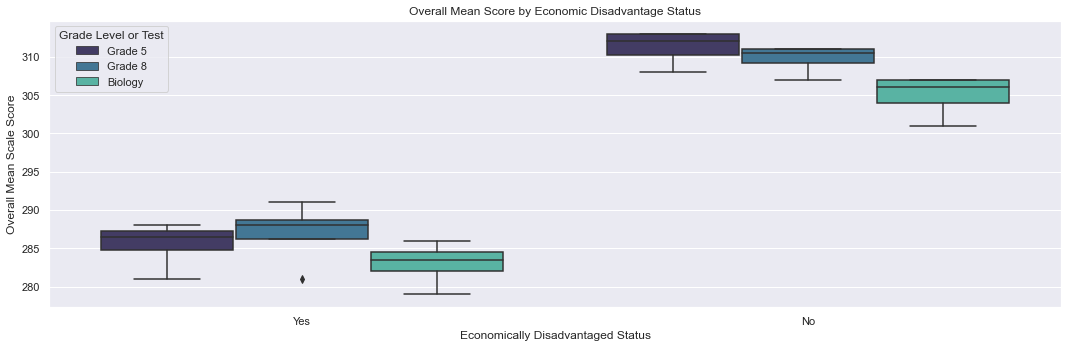

In [71]:
# Scaled Mean Scores over ALL Grade Levels by Economic Strata
ed = df1[(df1["Category"]=="Economically Disadvantaged Students")]
edg = sns.boxplot(x = "Group", y = "Overall Mean Scale Score", data = ed, palette = "mako", hue = "Grade Level or Test")
edg.set_title("Overall Mean Score by Economic Disadvantage Status")
edg.set_xlabel("Economically Disadvantaged Status")
plt.tight_layout()

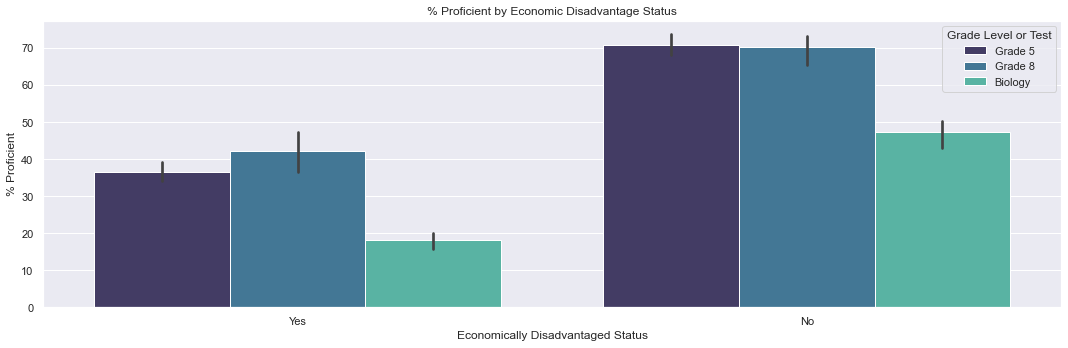

In [19]:
# % Proficient over ALL Grade Levels by Economic Strata
edg2 = sns.barplot(x = "Group", y = "% Proficient", data = ed, palette = "mako", hue = "Grade Level or Test")
edg2.set_title("% Proficient by Economic Disadvantage Status")
edg2.set_xlabel("Economically Disadvantaged Status")
plt.tight_layout()

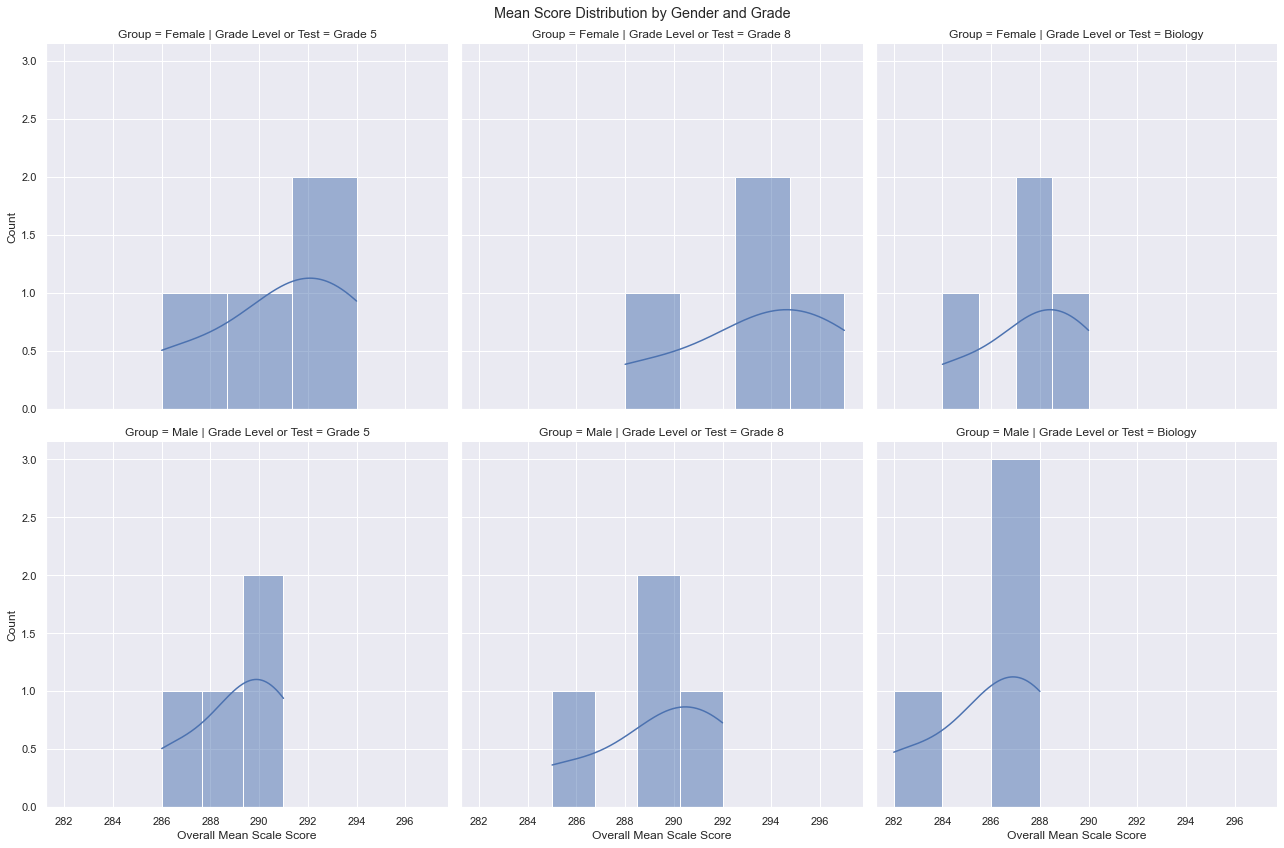

In [20]:
# Graph of Mean Score by Gender and Test Level / Grade
gen = gender.drop("Category", axis = 1)

gens = sns.FacetGrid(data = gen, col = "Grade Level or Test", row = "Group", height = 6, aspect = 1)
gens.map(sns.histplot,"Overall Mean Scale Score", kde = True)
gens.fig.suptitle("Mean Score Distribution by Gender and Grade")
plt.tight_layout()

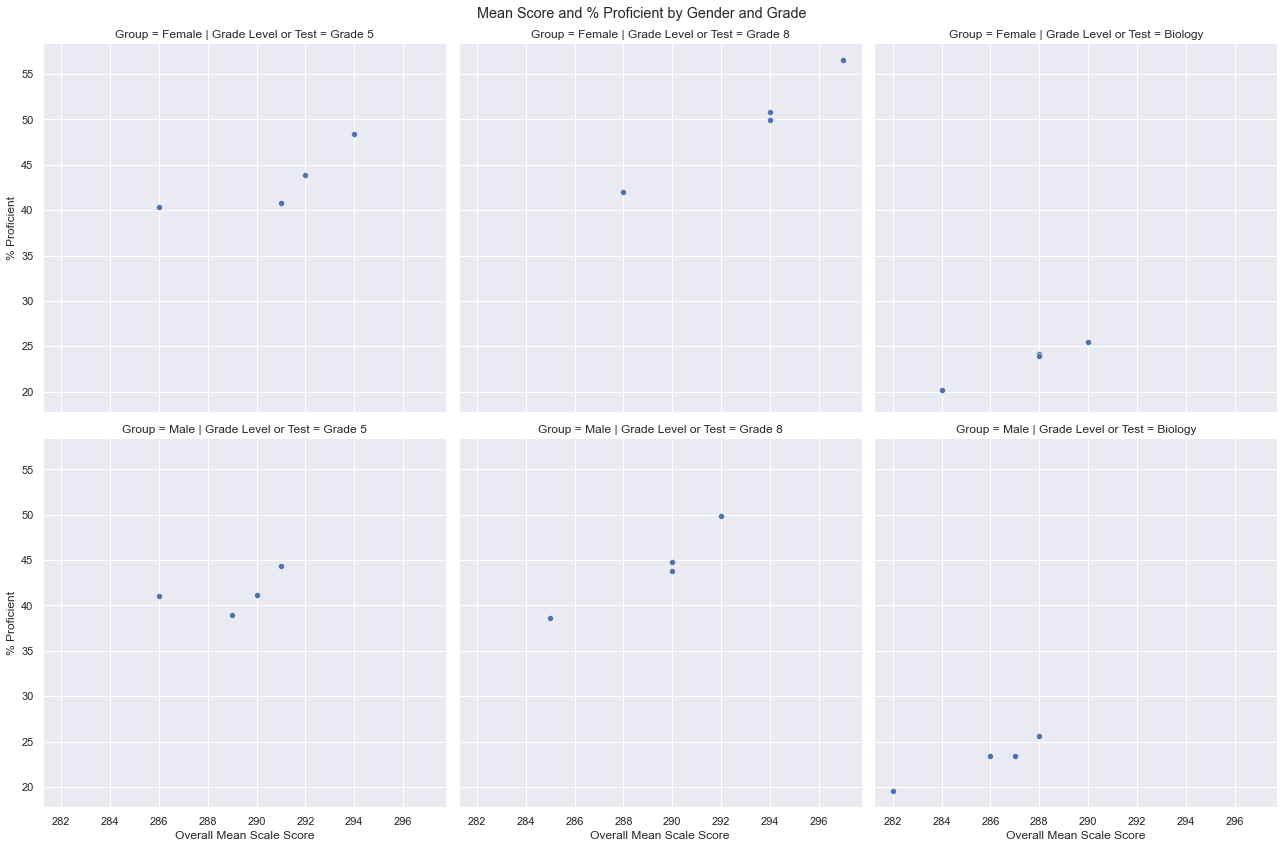

In [21]:
# Graph of Mean Score and % Proficient
gens2 = sns.FacetGrid ( data = gen, col = "Grade Level or Test", row = "Group", height = 6, aspect = 1)
gens2.map(sns.scatterplot,"Overall Mean Scale Score","% Proficient")
gens2.fig.suptitle("Mean Score and % Proficient by Gender and Grade")
plt.tight_layout()

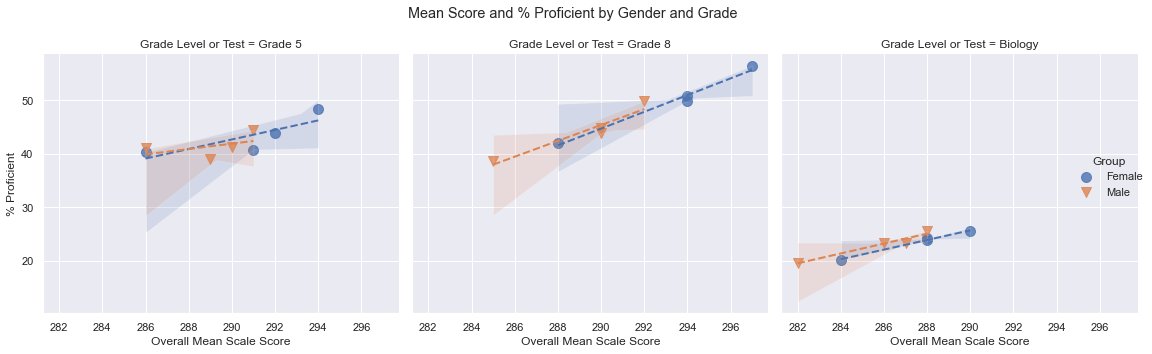

In [22]:
gens3 = sns.lmplot(x = "Overall Mean Scale Score", y = "% Proficient", data = gen, hue = "Group", col = "Grade Level or Test", markers = ["o","v"], scatter_kws={"s":100}, line_kws={"ls":"--","lw":2})
gens3.fig.suptitle("Mean Score and % Proficient by Gender and Grade")
plt.tight_layout()

In [23]:
# Male Study
m1 = df1["Group"].str.contains("/male", case = False, na = False)
m2 = df1["Group"].str.lower().isin(["male"])
male = df1[m1|m2]

male_1 = male[male["Group"]!="Unknown Race/Male"]
male_1

,Year,Grade Level or Test,Category,Group,# Students Tested,Overall Mean Scale Score,% Not Proficient,% Proficient,# Not Proficient,# Proficient
4,2019,Grade 5,Gender,Male,13316,286,59.0,41.0,7858,5458
6,2019,Grade 8,Gender,Male,12495,285,61.4,38.6,7669,4826
8,2019,Biology,Gender,Male,11396,282,80.4,19.6,9163,2233
33,2019,Grade 5,Race and Ethnicity/Gender,American Indian/Male,31,290,61.3,38.7,19,12
35,2019,Grade 5,Race and Ethnicity/Gender,Asian/Male,574,310,31.0,69.0,178,396
...,...,...,...,...,...,...,...,...,...,...
361,2016,Biology,Race and Ethnicity/Gender,Asian/Male,467,305,51.0,49.0,238,229
363,2016,Biology,Race and Ethnicity/Gender,"Black, Non-Hispanic/Male",3437,279,86.7,13.3,2980,457
366,2016,Biology,Race and Ethnicity/Gender,Hispanic/Male,5125,289,73.8,26.2,3784,1341
368,2016,Biology,Race and Ethnicity/Gender,"White, Non-Hispanic/Male",915,308,47.5,52.5,435,480


Text(0.5, 1.0, 'Mean Score by Group of Males by Year')

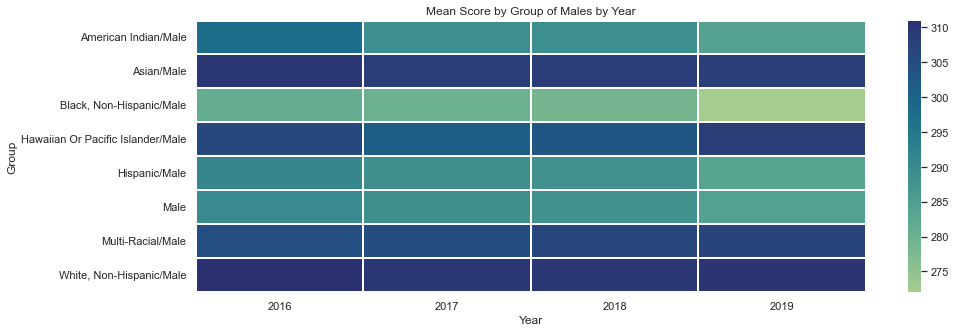

In [24]:
# Heat Map for Males by Average Score and Year
mah = sns.heatmap(male_1.pivot_table(index = "Group", columns = "Year", values = "Overall Mean Scale Score"), linecolor = "white",linewidth = 2, cmap = "crest")
mah.set_title("Mean Score by Group of Males by Year")

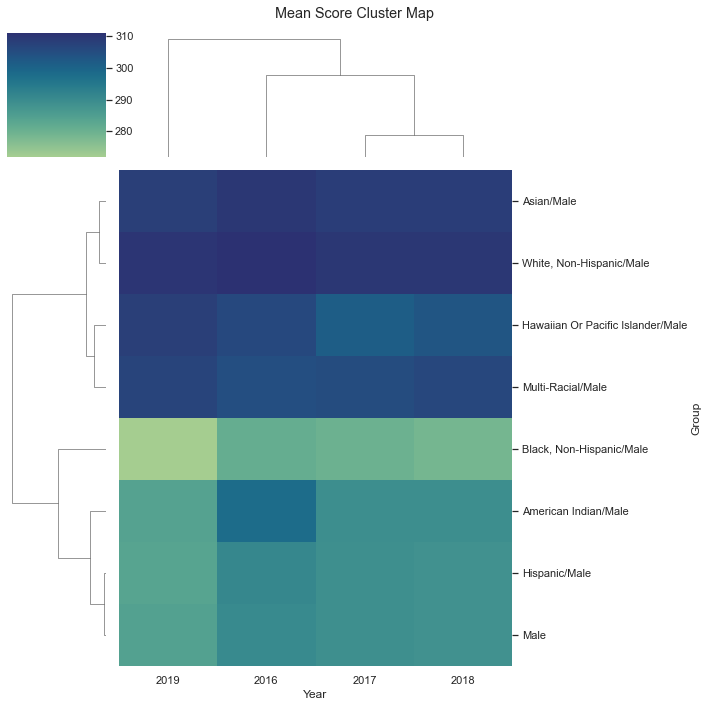

In [25]:
# Cluster Map for Males by Average Score and Year
mas = sns.clustermap(male_1.pivot_table(index = "Group", columns = "Year", values = "Overall Mean Scale Score"), cmap = "crest")
mas.fig.suptitle("Mean Score Cluster Map")
plt.tight_layout()

Text(0.5, 1.0, '% Proficient by Group of Males by Year')

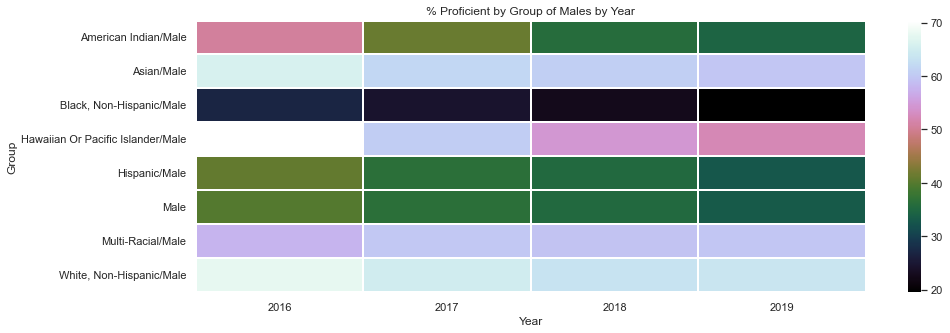

In [26]:
# Heat Map for Males by % Proficient and Year
mph = sns.heatmap(male_1.pivot_table(index = "Group", columns = "Year", values = "% Proficient"), linecolor = "white",linewidth = 2, cmap = "cubehelix")
mph.set_title("% Proficient by Group of Males by Year")

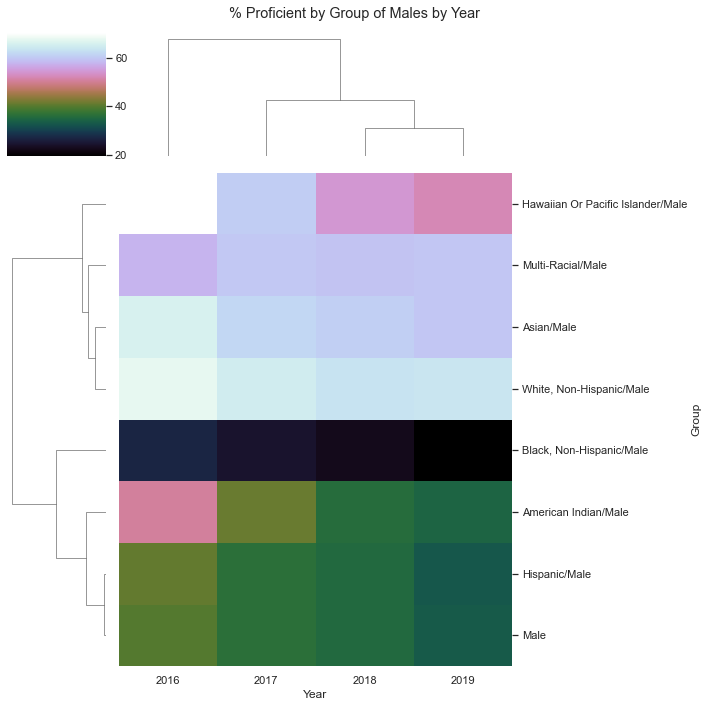

In [27]:
# Cluster Map for Males by % Proficient and Year
mps = sns.clustermap(male_1.pivot_table(index = "Group", columns = "Year", values = "% Proficient"), cmap = "cubehelix")
mps.fig.suptitle("% Proficient by Group of Males by Year")
plt.tight_layout()

In [28]:
# Female Study
f1 = df1["Group"].str.contains("/female", case = False, na = False)
f2 = df1["Group"].str.lower().isin(["female"])
female = df1[f1|f2]

female_1 = female[female["Group"]!="Unknown Race/Female"]
female_1

,Year,Grade Level or Test,Category,Group,# Students Tested,Overall Mean Scale Score,% Not Proficient,% Proficient,# Not Proficient,# Proficient
3,2019,Grade 5,Gender,Female,13151,286,59.7,40.3,7846,5305
5,2019,Grade 8,Gender,Female,12284,288,58.0,42.0,7120,5164
7,2019,Biology,Gender,Female,11610,284,79.8,20.2,9265,2345
32,2019,Grade 5,Race and Ethnicity/Gender,American Indian/Female,38,287,60.5,39.5,23,15
34,2019,Grade 5,Race and Ethnicity/Gender,Asian/Female,490,313,28.4,71.6,139,351
...,...,...,...,...,...,...,...,...,...,...
362,2016,Biology,Race and Ethnicity/Gender,"Black, Non-Hispanic/Female",3822,283,84.1,15.9,3214,608
364,2016,Biology,Race and Ethnicity/Gender,Hawaiian Or Pacific Islander/Female,10,292,70.0,30.0,7,3
365,2016,Biology,Race and Ethnicity/Gender,Hispanic/Female,5152,289,75.8,24.2,3907,1245
367,2016,Biology,Race and Ethnicity/Gender,"White, Non-Hispanic/Female",927,312,42.0,58.0,389,538


Text(0.5, 1.0, 'Mean Score by Group of Females by Year')

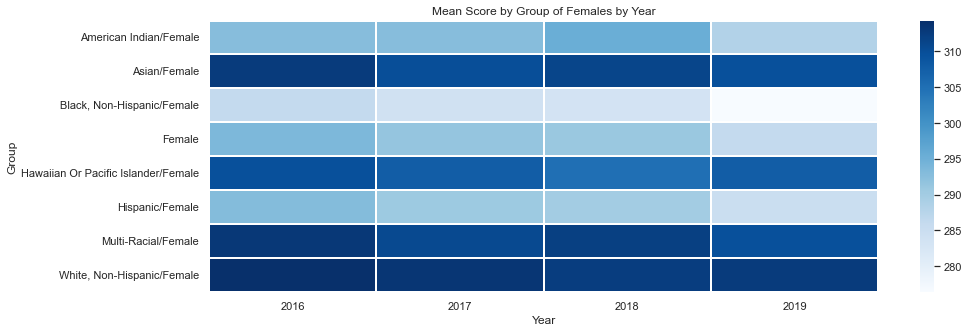

In [29]:
# Heat Map for Females by Average Score and Year
fah = sns.heatmap(female_1.pivot_table(index = "Group", columns = "Year", values = "Overall Mean Scale Score"), linecolor = "white",linewidth = 2, cmap = "Blues")
fah.set_title("Mean Score by Group of Females by Year")

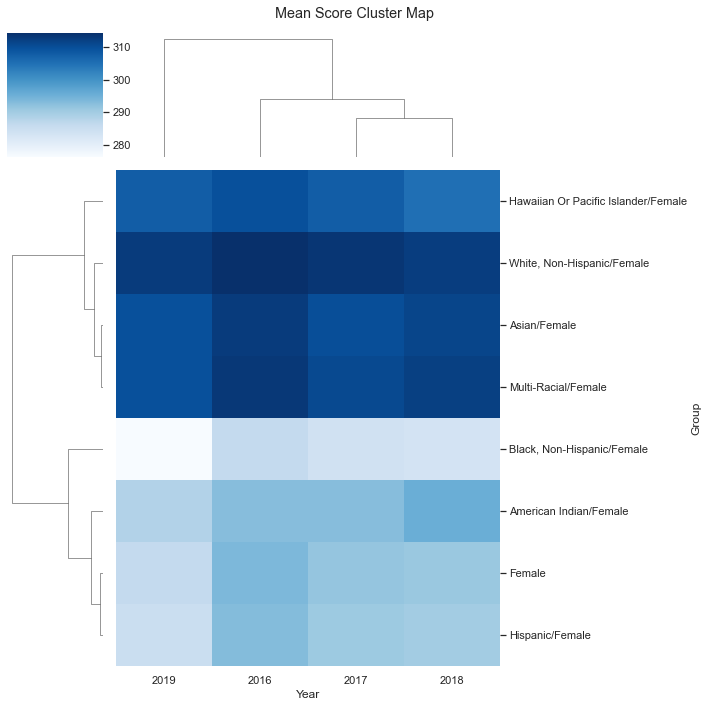

In [30]:
# Cluster Map for Females by Average Score and Year
fas = sns.clustermap(female_1.pivot_table(index = "Group", columns = "Year", values = "Overall Mean Scale Score"), cmap = "Blues")
fas.fig.suptitle("Mean Score Cluster Map")
plt.tight_layout()

Text(0.5, 1.0, '% Proficient by Group of Females by Year')

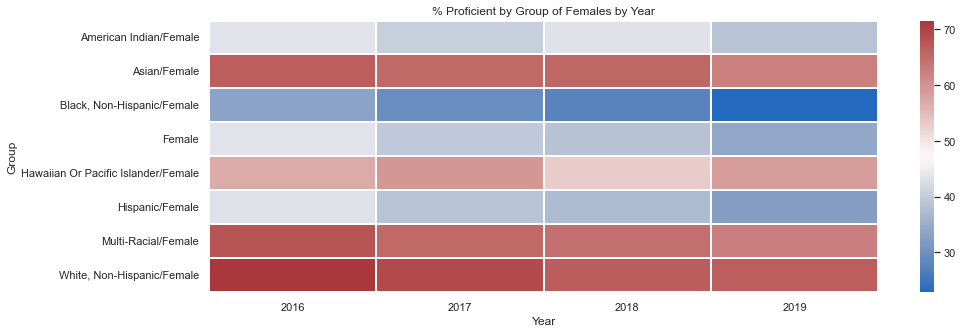

In [31]:
# Heat Map for Females by % Proficient and Year
fph = sns.heatmap(female_1.pivot_table(index = "Group", columns = "Year", values = "% Proficient"), linecolor = "white",linewidth = 2, cmap = "vlag")
fph.set_title("% Proficient by Group of Females by Year")

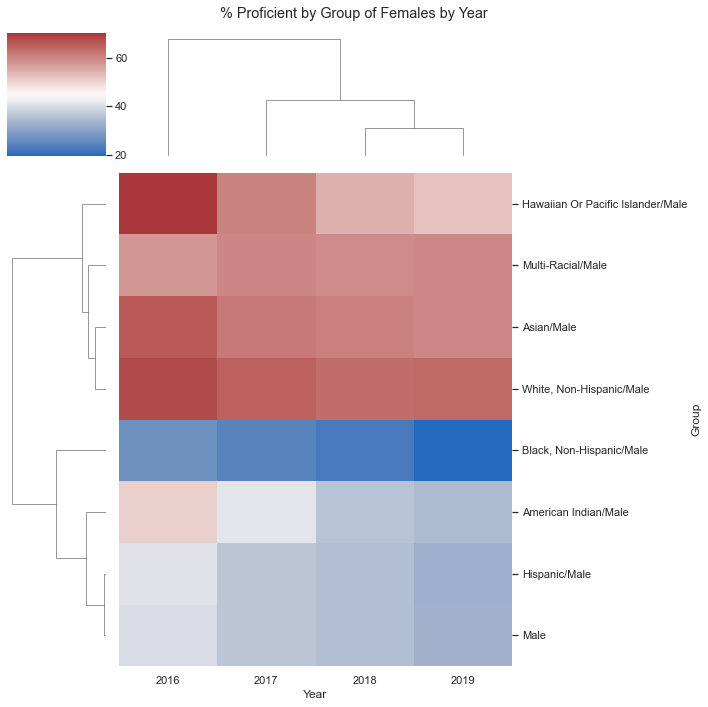

In [32]:
# Cluster Map for Females by % Proficient and Year
fps = sns.clustermap(male_1.pivot_table(index = "Group", columns = "Year", values = "% Proficient"), cmap = "vlag")
fps.fig.suptitle("% Proficient by Group of Females by Year")
plt.tight_layout()

<AxesSubplot:>

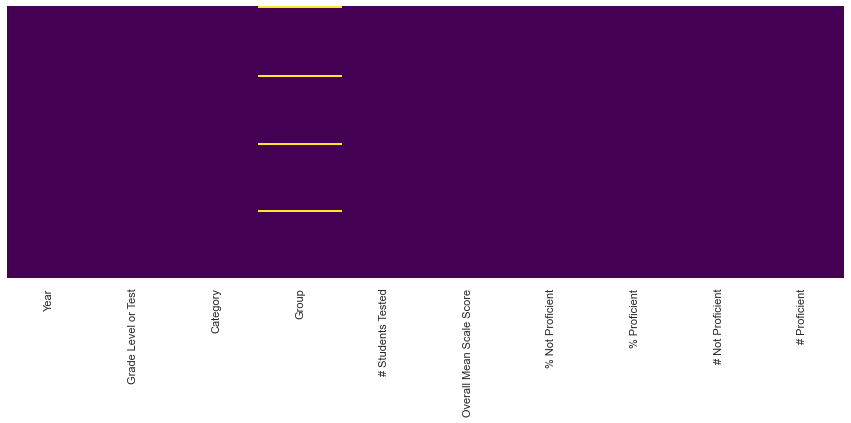

In [43]:
## CORRELATIONS
# Checking nulls
sns.heatmap(df1.isnull(), yticklabels = False, cbar = False, cmap = "viridis")

In [64]:
# Adding dummy values for Grades and English as Second Language
esl = pd.get_dummies(engp["Group"],drop_first = True)
gl = pd.get_dummies(engp["Grade Level or Test"],drop_first = True)
engp = pd.concat([engp,esl,gl],axis = 1)
engp.head()

,Year,Grade Level or Test,Category,Group,# Students Tested,Overall Mean Scale Score,% Not Proficient,% Proficient,# Not Proficient,# Proficient,Yes,Grade 5,Grade 8
82,2019,Grade 5,Students in CPS English Language Learner Programs,Yes,6025,272,78.4,21.6,4723,1302,1,1,0
83,2019,Grade 5,Students in CPS English Language Learner Programs,No,20442,290,53.7,46.3,10981,9461,0,1,0
84,2019,Grade 8,Students in CPS English Language Learner Programs,Yes,2835,263,87.8,12.2,2490,345,1,0,1
85,2019,Grade 8,Students in CPS English Language Learner Programs,No,21944,289,56.0,44.0,12299,9645,0,0,1
86,2019,Biology,Students in CPS English Language Learner Programs,Yes,2586,264,97.6,2.4,2525,61,1,0,0


In [66]:
# Correlation between Yes for Second Language and Overall Mean Score
st.pearsonr(engp["Yes"],engp["Overall Mean Scale Score"])

(-0.9528998946577102, 1.7921921436162326e-25)

In [68]:
# Correlation between Yes for Second Language and % Not Proficient
st.pearsonr(engp["Yes"],engp["% Not Proficient"])

(0.8345247482899056, 1.7171264150354598e-13)

In [94]:
# Total English Second Language Students
engp[engp["Yes"]== 1]["# Students Tested"].sum()

72537

In [108]:
# Years of Data for English Second Language
len(engp["Year"].unique())

4

In [72]:
# Adding dummy values for English as Second Language
edy = pd.get_dummies(ed["Group"],drop_first = True)
ed = pd.concat([ed,edy],axis = 1)
ed.head()

,Year,Grade Level or Test,Category,Group,# Students Tested,Overall Mean Scale Score,% Not Proficient,% Proficient,# Not Proficient,# Proficient,Yes
94,2019,Grade 5,Economically Disadvantaged Students,Yes,21246,281,66.1,33.9,14040,7206,1
95,2019,Grade 5,Economically Disadvantaged Students,No,5221,308,31.9,68.1,1664,3557,0
96,2019,Grade 8,Economically Disadvantaged Students,Yes,19744,281,65.5,34.5,12926,6818,1
97,2019,Grade 8,Economically Disadvantaged Students,No,5035,307,37.0,63.0,1863,3172,0
98,2019,Biology,Economically Disadvantaged Students,Yes,18442,279,85.3,14.7,15723,2719,1


In [73]:
# Correlation between Yes for Economic Disadvantage and Overall Mean Score
st.pearsonr(ed["Yes"],ed["Overall Mean Scale Score"])

(-0.9604735271290492, 1.0557016793977868e-13)

In [74]:
# Correlation between Yes for Economic Disadvantage and % Not Proficient
st.pearsonr(ed["Yes"],ed["% Not Proficient"])

(0.8055183338910976, 2.0449028367326393e-06)

In [93]:
# Total Economic Disadvantaged
ed[ed["Yes"]== 1]["# Students Tested"].sum()

237562

In [109]:
# Years of Data for Economic Disadvantaged
len(ed["Year"].unique())

4

In [99]:
# Adding dummy values for Gender: Yes = 1 =  Female 
fem = pd.get_dummies(gender["Group"])
gender = pd.concat([gender,fem],axis = 1).drop(["Male"], axis = 1)
gender.head()

,Year,Grade Level or Test,Category,Group,# Students Tested,Overall Mean Scale Score,% Not Proficient,% Proficient,# Not Proficient,# Proficient,Female
3,2019,Grade 5,Gender,Female,13151,286,59.7,40.3,7846,5305,1
4,2019,Grade 5,Gender,Male,13316,286,59.0,41.0,7858,5458,0
5,2019,Grade 8,Gender,Female,12284,288,58.0,42.0,7120,5164,1
6,2019,Grade 8,Gender,Male,12495,285,61.4,38.6,7669,4826,0
7,2019,Biology,Gender,Female,11610,284,79.8,20.2,9265,2345,1


In [101]:
# Correlation between Female and Overall Mean Score
st.pearsonr(gender["Female"],gender["Overall Mean Scale Score"])

(0.3580574370197165, 0.08580298489132622)

In [102]:
# Correlation between Female and % Not Proficient
st.pearsonr(gender["Female"],gender["% Not Proficient"])

(-0.12059849594193489, 0.574575752258443)

In [103]:
# Total Female
gender[gender["Female"]== 1]["# Students Tested"].sum()

143852

In [110]:
# Years of Data for Female
len(gender["Year"].unique())

4

In [80]:
# Adding dummy values for White
raceeth = pd.get_dummies(raeth["Group"])
white = pd.concat([raeth,raceeth],axis = 1).drop(["American Indian","Asian","Black, Non-Hispanic","Hawaiian Or Pacific Islander", "Hispanic","Multi-Racial"], axis = 1)
white.head()

,Year,Grade Level or Test,Category,Group,# Students Tested,Overall Mean Scale Score,% Not Proficient,% Proficient,# Not Proficient,# Proficient,"White, Non-Hispanic"
9,2019,Grade 5,Race and Ethnicity,American Indian,69,289,60.9,39.1,42,27,0
10,2019,Grade 5,Race and Ethnicity,Asian,1064,312,29.8,70.2,317,747,0
11,2019,Grade 5,Race and Ethnicity,"Black, Non-Hispanic",9366,275,73.5,26.5,6884,2482,0
12,2019,Grade 5,Race and Ethnicity,Hawaiian Or Pacific Islander,47,307,38.3,61.7,18,29,0
13,2019,Grade 5,Race and Ethnicity,Hispanic,12809,286,59.5,40.5,7626,5183,0


In [81]:
# Correlation between White and Overall Mean Score
st.pearsonr(white["White, Non-Hispanic"],white["Overall Mean Scale Score"])

(0.4035571473382502, 0.000140965966632615)

In [82]:
# Correlation between White and % Not Proficient
st.pearsonr(white["White, Non-Hispanic"],white["% Not Proficient"])

(-0.3506973024391332, 0.0010733293017761798)

In [91]:
# Total White, Non-Hispanic Tested
white[white["White, Non-Hispanic"]== 1]["# Students Tested"].sum()

28414

In [107]:
# Years of Data for White
len(white["Year"].unique())

4

In [83]:
# Adding dummy values for Black, Non-Hispanic
blacknh = pd.concat([raeth,raceeth],axis = 1).drop(["American Indian","Asian","White, Non-Hispanic","Hawaiian Or Pacific Islander", "Hispanic","Multi-Racial"], axis = 1)
blacknh.head()

,Year,Grade Level or Test,Category,Group,# Students Tested,Overall Mean Scale Score,% Not Proficient,% Proficient,# Not Proficient,# Proficient,"Black, Non-Hispanic"
9,2019,Grade 5,Race and Ethnicity,American Indian,69,289,60.9,39.1,42,27,0
10,2019,Grade 5,Race and Ethnicity,Asian,1064,312,29.8,70.2,317,747,0
11,2019,Grade 5,Race and Ethnicity,"Black, Non-Hispanic",9366,275,73.5,26.5,6884,2482,1
12,2019,Grade 5,Race and Ethnicity,Hawaiian Or Pacific Islander,47,307,38.3,61.7,18,29,0
13,2019,Grade 5,Race and Ethnicity,Hispanic,12809,286,59.5,40.5,7626,5183,0


In [84]:
# Correlation between Black and Overall Mean Score
st.pearsonr(blacknh["Black, Non-Hispanic"],blacknh["Overall Mean Scale Score"])

(-0.6392282158033612, 5.992558771904303e-11)

In [85]:
# Correlation between Black and % Not Proficient
st.pearsonr(blacknh["Black, Non-Hispanic"],blacknh["% Not Proficient"])

(0.5440434629366054, 8.859939013831876e-08)

In [90]:
# Total Black, Non-Hispanic Tested
blacknh[blacknh["Black, Non-Hispanic"]== 1]["# Students Tested"].sum()

100301

In [111]:
# Years of Data for Black
len(blacknh["Year"].unique())

4